In [1]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn import cluster, preprocessing, datasets

%matplotlib inline

In [2]:
np.random.seed(42)

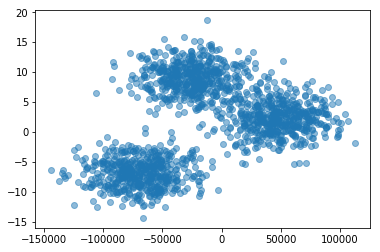

In [3]:
x, y = datasets.make_blobs(centers=3, n_features=2, n_samples=1500, cluster_std=2.5)
x[:, 0] *= 10000
x1, x2 = x.T

plt.scatter(x1, x2, alpha=0.5);

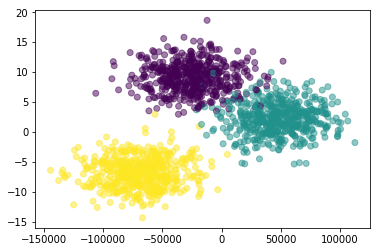

In [4]:
plt.scatter(x1, x2, c=y, alpha=0.5);

Note que os eixos não estão na mesma escala. Ao utilizar uma medida de distância, pode haver distorção no espaço.

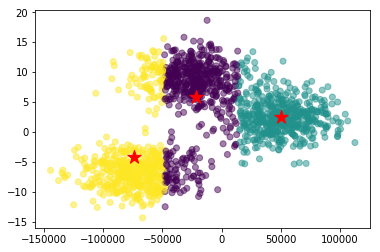

In [11]:
km = cluster.KMeans(n_clusters=3)
km.fit(x)

plt.scatter(*x.T, c=km.predict(x), alpha=0.5)
plt.scatter(*km.cluster_centers_.T, marker='*', s=200, c='r');

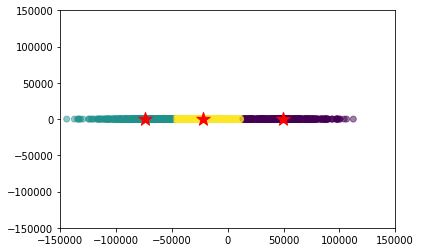

In [6]:
plt.scatter(x1, x2, c=km.predict(x), alpha=0.5)
plt.scatter(*km.cluster_centers_.T, marker='*', s=200, c='r')
plt.xlim((-150000, 150000))
plt.ylim((-150000, 150000));

Para colocar ambos os eixos na mesma escala, basta calcular o mínimo e máximo de cada atributo $X_i$, e então utilizar uma transformação $X'_i = \frac{X_i - min\{X_i\}}{max\{X_i\} - min\{X_i\}}$.

Essa transformação já está implementada na classe `sklearn.preprocessing.MinMaxScaler`.

In [7]:
scaler = preprocessing.MinMaxScaler()
x_t = scaler.fit_transform(x)

In [8]:
x[:5]

array([[  4.30410698e+04,   4.00019037e+00],
       [ -7.45562898e+04,  -9.19069245e+00],
       [ -5.62996688e+04,  -1.03783750e+01],
       [  6.33469351e+04,   7.53391164e-01],
       [  9.79363778e+04,   4.99408526e+00]])

In [9]:
x_t[:5]

array([[ 0.72948358,  0.55623876],
       [ 0.27153469,  0.15656426],
       [ 0.34262982,  0.12057832],
       [ 0.8085589 ,  0.45786302],
       [ 0.94325748,  0.58635308]])

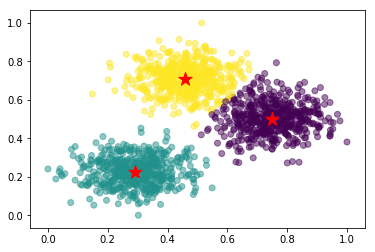

In [10]:
km_t = cluster.KMeans(n_clusters=3)
km_t.fit(x_t)

plt.scatter(*x_t.T, c=km_t.predict(x_t), alpha=0.5)
plt.scatter(*km_t.cluster_centers_.T, marker='*', s=200, c='r');